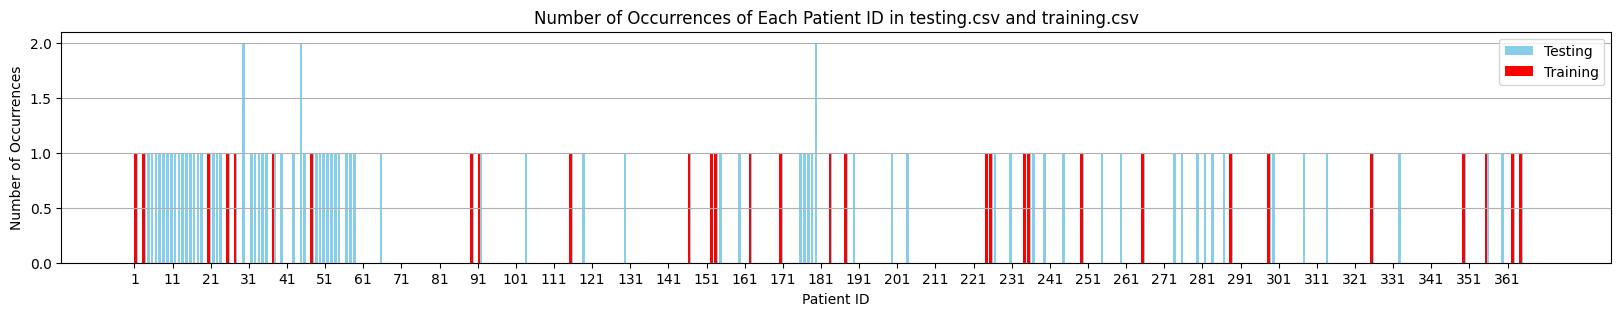

In [1]:
# from the testing.csv, plot a bar chart showing the number of occurances of each patientID (given that we have from 001 to 369)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_test = pd.read_csv('testing.csv')
patient_counts = data_test['Patient'].value_counts().sort_index()

data_train = pd.read_csv('training.csv')
patient_counts_train = data_train['Patient'].value_counts().sort_index()

all_patient_ids = pd.Index(range(1, 370))
patient_counts = patient_counts.reindex(all_patient_ids, fill_value=0)
patient_counts_train = patient_counts_train.reindex(all_patient_ids, fill_value=0)

plt.figure(figsize=(20, 3))
bar_width = 0.7
indices = np.arange(1, 370)
plt.bar(indices - bar_width/2, patient_counts.values, width=bar_width, color='skyblue', label='Testing', linewidth=2)
plt.bar(indices + bar_width/2, patient_counts_train.values, width=bar_width, color='red', label='Training', linewidth=2)
plt.xlabel('Patient ID')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Patient ID in testing.csv and training.csv')
plt.xticks(np.arange(1, 370, step=10))  # Adjust x-ticks for better readability
plt.legend()
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

In [2]:
# do table showing median, average, % of used patients (patients with at least one occurrence) for both testing and training
def compute_stats(data):
    patient_counts = data['Patient'].value_counts().reindex(all_patient_ids, fill_value=0)
    patientID = (data['Patient'].unique())
    patientID_average = np.mean([int(x) for x in patientID])
    patientID_median = np.median([int(x) for x in patientID])
    used_patients_percentage = (patient_counts > 0).sum() / len(patient_counts) * 100
    return patientID_median, patientID_average, used_patients_percentage

median_test, average_test, used_percentage_test = compute_stats(data_test)
median_train, average_train, used_percentage_train = compute_stats(data_train)

# format
used_percentage_test = f"{used_percentage_test:.2f}%"
used_percentage_train = f"{used_percentage_train:.2f}%"
average_test = round(average_test, 2)
average_train = round(average_train, 2)

stats_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Samples': [int(30), int(100)],
    'Used Patients': [used_percentage_train, used_percentage_test],
    'Median': [median_train, median_test],
    'Average': [average_train, average_test],
})

# transpose for better readability
stats_df = stats_df.set_index('Dataset').transpose()
print(f"Total number of patients:{369}")
print(stats_df)

Total number of patients:369
Dataset       Training Testing
Samples             30     100
Used Patients    8.13%  26.29%
Median           176.5   104.0
Average         179.37  135.77


Training Tumor Size Statistics:
Smallest Tumor: 124
Largest Tumor: 4572
Average Tumor Size: 2284.15
Median Tumor Size: 2250.0

Testing Tumor Size Statistics:
Smallest Tumor: 296
Largest Tumor: 4910
Average Tumor Size: 1872.80
Median Tumor Size: 1667.0



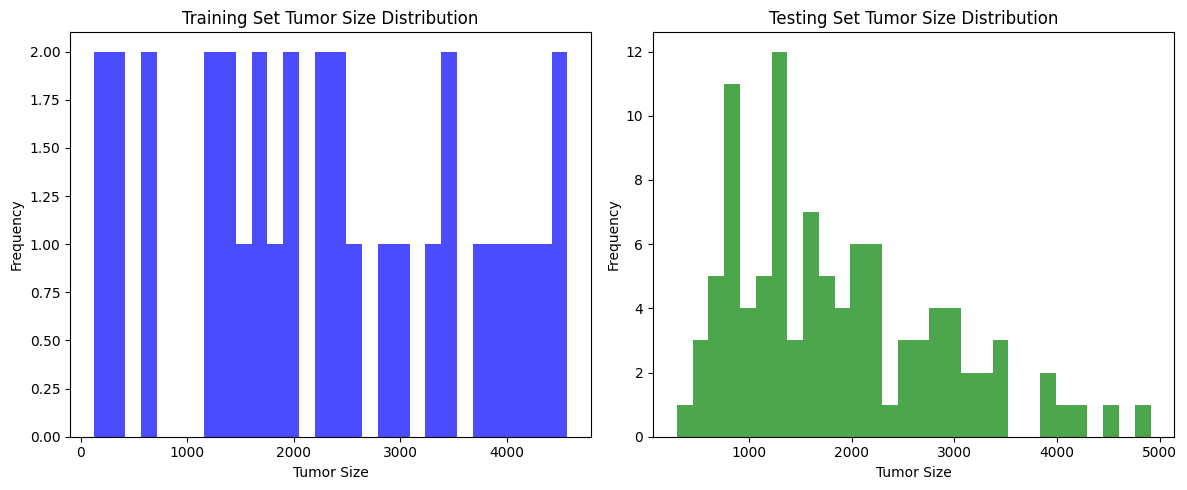

/tmp/ipykernel_1094/1785295514.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_tumor_sizes, testing_tumor_sizes], labels=['Training', 'Testing'])


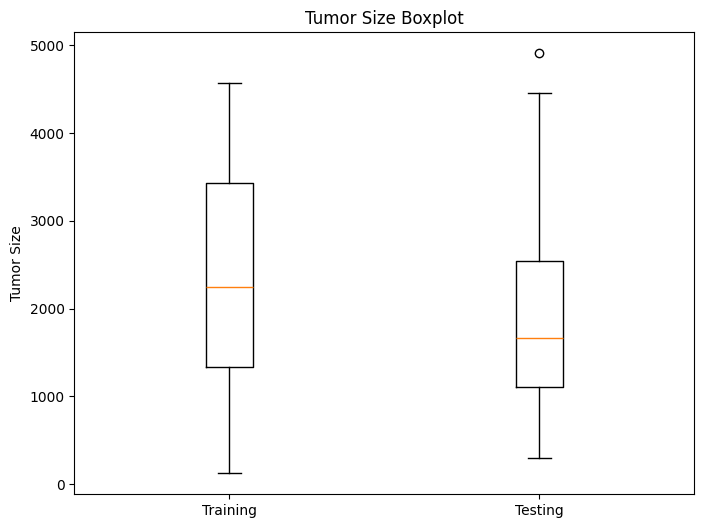

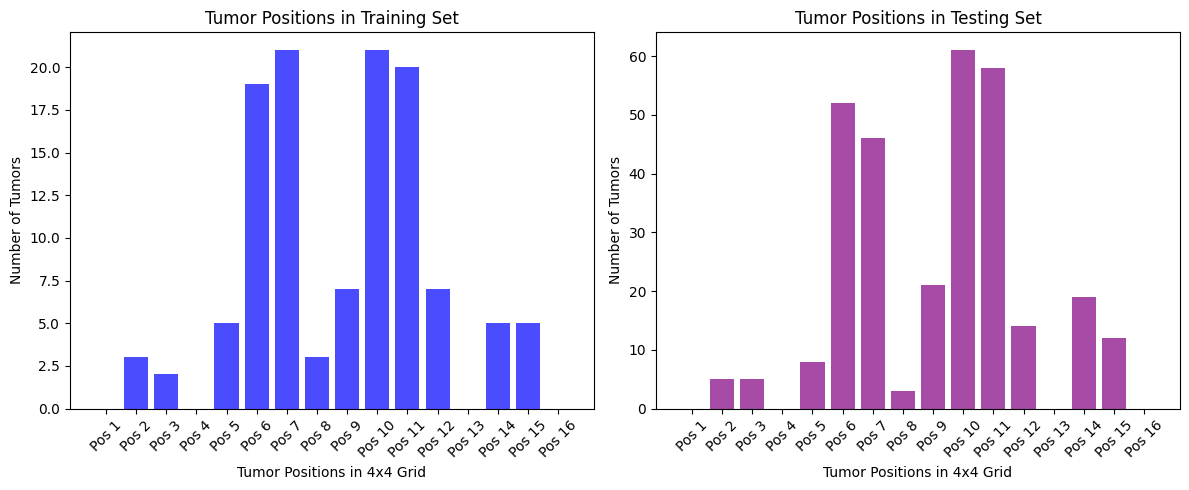

In [ ]:
import os
def get_tumor_sizes_and_positions(folder):
    tumor_sizes = []
    tumor_positions = np.zeros((4, 4), dtype=int)  # 4x4 grid for positions

    for filename in os.listdir(folder):
        if filename.endswith('_mask.npy'):
            mask = np.load(os.path.join(folder, filename))
            tumor_size = np.sum(mask > 0)
            if tumor_size > 0:
                tumor_sizes.append(tumor_size)
                # Determine position in 4x4 grid
                h, w = mask.shape
                grid_h, grid_w = h // 4, w // 4
                for i in range(4):
                    for j in range(4):
                        if np.any(mask[i*grid_h:(i+1)*grid_h, j*grid_w:(j+1)*grid_w] > 0):
                            tumor_positions[i, j] += 1

    return tumor_sizes, tumor_positions
training_tumor_sizes, training_tumor_positions = get_tumor_sizes_and_positions('training_set_npy')
testing_tumor_sizes, testing_tumor_positions = get_tumor_sizes_and_positions('testing_set_npy')

def print_tumor_stats(tumor_sizes, dataset_name):
    if len(tumor_sizes) == 0:
        print(f"No tumors found in {dataset_name} dataset.")
        return
    smallest = np.min(tumor_sizes)
    largest = np.max(tumor_sizes)
    average = np.mean(tumor_sizes)
    median = np.median(tumor_sizes)
    print(f"{dataset_name} Tumor Size Statistics:")
    print(f"Smallest Tumor: {smallest}")
    print(f"Largest Tumor: {largest}")
    print(f"Average Tumor Size: {average:.2f}")
    print(f"Median Tumor Size: {median}\n")
print_tumor_stats(training_tumor_sizes, "Training")
print_tumor_stats(testing_tumor_sizes, "Testing")

# plot histogram of tumor sizes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(training_tumor_sizes, bins=30, color='blue', alpha=0.7)
plt.title('Training Set Tumor Size Distribution')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(testing_tumor_sizes, bins=30, color='green', alpha=0.7)
plt.title('Testing Set Tumor Size Distribution')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# plot boxplot of tumor sizes
plt.figure(figsize=(8, 6))
plt.boxplot([training_tumor_sizes, testing_tumor_sizes], labels=['Training', 'Testing'])
plt.title('Tumor Size Boxplot')
plt.ylabel('Tumor Size')
plt.show()

def plot_tumor_positions(tumor_positions, dataset_name, testing_tumor_positions, testing_dataset_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(range(16), tumor_positions.flatten(), color='blue', alpha=0.7)
    plt.xticks(range(16), [f"Pos {i+1}" for i in range(16)], rotation=45)
    plt.xlabel('Tumor Positions in 4x4 Grid')
    plt.ylabel('Number of Tumors')
    plt.title(f'Tumor Positions in {dataset_name} Set')
    plt.subplot(1, 2, 2)
    plt.bar(range(16), testing_tumor_positions.flatten(), color='purple', alpha=0.7)
    plt.xticks(range(16), [f"Pos {i+1}" for i in range(16)], rotation=45)
    plt.xlabel('Tumor Positions in 4x4 Grid')
    plt.ylabel('Number of Tumors')
    plt.title(f'Tumor Positions in {testing_dataset_name} Set')
    plt.tight_layout()
    plt.show()
plot_tumor_positions(training_tumor_positions, "Training", testing_tumor_positions, "Testing")
